In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

student =pd.read_csv("C:/Users/bhara/Desktop/project/student.csv")
print(student.head())
print(student.describe())
student["total"]=pd.Series(student["G1"]+student["G2"]+student["G3"], index=student.index)
student["avg"]=pd.Series(student["total"]/3)
student["P or F"]=np.where(student["avg"]>10,1,0)


  school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18.0       U     GT3       A   4.0   4.0  at_home   teacher   
1     GP   F  17.0       U     GT3       T   1.0   1.0  at_home     other   
2     GP   F  15.0       U     LE3       T   1.0   1.0  at_home     other   
3     GP   F  15.0       U     GT3       T   4.0   2.0   health  services   
4     GP   F  16.0       U     GT3       T   3.0   3.0    other     other   

   ...  famrel freetime  goout  Dalc  Walc health absences    G1    G2    G3  
0  ...     4.0      3.0    4.0   1.0   1.0    3.0      4.0   0.0  11.0  11.0  
1  ...     5.0      3.0    3.0   1.0   1.0    3.0      2.0   9.0  11.0  11.0  
2  ...     4.0      3.0    2.0   2.0   3.0    3.0      6.0  12.0  13.0  12.0  
3  ...     3.0      2.0    2.0   1.0   1.0    5.0      0.0  14.0  14.0  14.0  
4  ...     4.0      3.0    2.0   1.0   2.0    5.0      0.0  11.0  13.0  13.0  

[5 rows x 33 columns]
              age        Medu        Fed

In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

student["S_school"]=le.fit_transform(student[["school"]])
student["S_sex"]=le.fit_transform(student[["sex"]])
student["S_address"]=le.fit_transform(student[["address"]])
student["S_famsize"]=le.fit_transform(student[["famsize"]])
student["S_Pstatus"]=le.fit_transform(student[["Pstatus"]])
student["S_Mjob"]=le.fit_transform(student[["Mjob"]])
student["S_Fjob"]=le.fit_transform(student[["Fjob"]])
student["S_reason"]=le.fit_transform(student[["reason"]])
student["S_guardian"]=le.fit_transform(student[["guardian"]])
student["S_schoolsup"]=le.fit_transform(student[["schoolsup"]])
student["S_famsup"]=le.fit_transform(student[["famsup"]])
student["S_paid"]=le.fit_transform(student[["paid"]])
student["S_activities"]=le.fit_transform(student[["activities"]])
student["S_nursery"]=le.fit_transform(student[["nursery"]])
student["S_higher"]=le.fit_transform(student[["higher"]])
student["S_internet"]=le.fit_transform(student[["internet"]])
student["S_romantic"]=le.fit_transform(student[["romantic"]])
col=["age","Medu","Fedu","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","absences","S_school","S_sex","S_address","S_famsize","S_Pstatus","S_Mjob","S_Fjob","S_reason","S_guardian","S_schoolsup","S_famsup","S_paid","S_activities","S_nursery","S_higher","S_internet","S_romantic"]
print(student[col].head(5))
target=student["P or F"]


    age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0  18.0   4.0   4.0         2.0        2.0       0.0     4.0       3.0    4.0   
1  17.0   1.0   1.0         1.0        2.0       0.0     5.0       3.0    3.0   
2  15.0   1.0   1.0         1.0        2.0       0.0     4.0       3.0    2.0   
3  15.0   4.0   2.0         1.0        3.0       0.0     3.0       2.0    2.0   
4  16.0   3.0   3.0         1.0        2.0       0.0     4.0       3.0    2.0   

   Dalc     ...      S_reason  S_guardian  S_schoolsup  S_famsup  S_paid  \
0   1.0     ...             0           1            1         0       0   
1   1.0     ...             0           0            0         1       0   
2   2.0     ...             2           1            1         0       0   
3   1.0     ...             1           1            0         1       0   
4   1.0     ...             1           0            0         1       0   

   S_activities  S_nursery  S_higher  S_internet  S_roma

C:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(student[col], target, test_size=0.3)
SC=StandardScaler()
X_train = SC.fit_transform(X_train)
X_test  = SC.transform(X_test)


from dask.distributed import Client
client=Client()
client


C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  """


Client Scheduler: tcp://127.0.0.1:49837 Dashboard: http://127.0.0.1:8787,Cluster Workers: 2 Cores: 2 Memory: 1.98 GB


In [4]:
from tpot import TPOTClassifier
tpot=TPOTClassifier(verbosity=2, generations=10,population_size=649)
tpot.fit(X_train, Y_train) 
A=format(tpot.score(X_test,Y_test))
print("Accuray TPOT Score: {}".format(tpot.score(X_test,Y_test)))
y_pred=tpot.predict(X_test)
print("predict score:",y_pred)

C:\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


HBox(children=(IntProgress(value=0, description='Optimization Progress', max=7139, style=ProgressStyle(description_width='initial')), HTML(value='')))

Generation 1 - Current best internal CV score: 0.8174236874236875
Generation 2 - Current best internal CV score: 0.8174236874236875
Generation 3 - Current best internal CV score: 0.8195487604183255
Generation 4 - Current best internal CV score: 0.8238732282210541
Generation 5 - Current best internal CV score: 0.8263125763125764
Generation 6 - Current best internal CV score: 0.8263125763125764
Generation 7 - Current best internal CV score: 0.8263125763125764
Generation 8 - Current best internal CV score: 0.8283893401284704
Generation 9 - Current best internal CV score: 0.8283893401284704
Generation 10 - Current best internal CV score: 0.8283893401284704

Best pipeline: BernoulliNB(ExtraTreesClassifier(KNeighborsClassifier(OneHotEncoder(input_matrix, minimum_fraction=0.2, sparse=False, threshold=10), n_neighbors=17, p=1, weights=uniform), bootstrap=True, criterion=gini, max_features=0.6000000000000001, min_samples_leaf=2, min_samples_split=14, n_estimators=100), alpha=10.0, fit_prior=Tru

In [2]:
from tpot import TPOTClassifier
tpot=TPOTClassifier()
tpot

C:\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=100,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=100,
        random_state=None, scoring=None, subsample=1.0,
        template='RandomTree', use_dask=False, verbosity=0,
        warm_start=False)

In [5]:
new_predict = pd.read_csv("C:/Users/bhara/Desktop/Book2.csv")
print(new_predict.head())

new_predict["school"]= le.fit_transform(new_predict["school"])
new_predict["sex"]= le.fit_transform(new_predict["sex"])
new_predict["address"]=le.fit_transform(new_predict["address"])
new_predict["famsize"]= le.fit_transform(new_predict["famsize"])
new_predict["Pstatus"]= le.fit_transform(new_predict["Pstatus"])
new_predict["Mjob"]= le.fit_transform(new_predict["Mjob"])
new_predict["Fjob"]= le.fit_transform(new_predict["Fjob"])
new_predict["reason"]= le.fit_transform(new_predict["reason"])
new_predict["guardian"]= le.fit_transform(new_predict["guardian"])
new_predict["schoolsup"]= le.fit_transform(new_predict["schoolsup"])
new_predict["famsup"]= le.fit_transform(new_predict["famsup"])
new_predict["paid"]= le.fit_transform(new_predict["paid"])
new_predict["activities"]= le.fit_transform(new_predict["activities"])
new_predict["nursery"]= le.fit_transform(new_predict["nursery"])
new_predict["higher"]= le.fit_transform(new_predict["higher"])
new_predict["internet"]= le.fit_transform(new_predict["internet"])
new_predict["romantic"]= le.fit_transform(new_predict["romantic"])



print(new_predict.head())
print(new_predict.describe())
y_pred1=tpot.predict(new_predict)
print("predict score:",y_pred1)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   M   18       U     GT3       T     4     4  at_home  teacher   
1     GP   F   20       R     GT3       T     3     2  service    other   
2     MS   M   22       U     LT3       T     2     4  at_home  service   
3     MS   F   22       R     LT3       T     1     2  at_home   health   
4     GP   M   18       U     GT3       T     0     0  at_home    other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         4     3    1    1      5   
1   ...       yes      yes        no       4         3     3    1    1      4   
2   ...       yes      yes        no       4         3     2    2    2      5   
3   ...        no       no        no       4         4     3    2    3      4   
4   ...       yes       no       yes       5         1     4    1    1      5   

  absences  
0       76  
1       75  
2       81  
3       65

In [6]:
student2= pd.read_csv("C:/Users/bhara/Desktop/project/student2.csv")
print(student2.head())
print(student2.describe())
print(student2.sum().isnull())
student2["Total"]=pd.Series(student2["G1"]+student2["G2"]+student2["G3"], index=student2.index)
student2["AVG"]=pd.Series(student2["Total"]/3)
student2["P/F"]=np.where(student2["AVG"]>10,1,0)
student2.head()

  school sex  age famsize  Medu  Fedu     Mjob      Fjob  reason  traveltime  \
0     GP   F   18     GT3     4     4  at_home   teacher  course           2   
1     GP   F   17     GT3     1     1  at_home     other  course           1   
2     GP   F   15     LE3     1     1  at_home     other   other           1   
3     GP   F   15     GT3     4     2   health  services    home           1   
4     GP   F   16     GT3     3     3    other     other    home           1   

  ...  higher  internet freetime goout Dalc Walc  absences  G1  G2  G3  
0 ...     yes        no        3     4    1    1         6   5   6   6  
1 ...     yes       yes        3     3    1    1         4   5   5   6  
2 ...     yes       yes        3     2    2    3        10   7   8  10  
3 ...     yes       yes        2     2    1    1         2  15  14  15  
4 ...     yes        no        3     2    1    2         4   6  10  10  

[5 rows x 24 columns]
              age        Medu        Fedu  traveltime   st

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,goout,Dalc,Walc,absences,G1,G2,G3,Total,AVG,P/F
0,GP,F,18,GT3,4,4,at_home,teacher,course,2,...,4,1,1,6,5,6,6,17,5.666667,0
1,GP,F,17,GT3,1,1,at_home,other,course,1,...,3,1,1,4,5,5,6,16,5.333333,0
2,GP,F,15,LE3,1,1,at_home,other,other,1,...,2,2,3,10,7,8,10,25,8.333333,0
3,GP,F,15,GT3,4,2,health,services,home,1,...,2,1,1,2,15,14,15,44,14.666667,1
4,GP,F,16,GT3,3,3,other,other,home,1,...,2,1,2,4,6,10,10,26,8.666667,0


In [8]:
student2["school"]=le.fit_transform(student2["school"])
student2["sex"]=le.fit_transform(student2["sex"])
student2["famsize"]=le.fit_transform(student2["famsize"])
student2["Mjob"]=le.fit_transform(student2["Mjob"])
student2["Fjob"]=le.fit_transform(student2["Fjob"])
student2["reason"]=le.fit_transform(student2["reason"])
student2["famsup"]=le.fit_transform(student2["famsup"])
student2["activities"]=le.fit_transform(student2["activities"])
student2["higher"]=le.fit_transform(student2["higher"])
student2["internet"]=le.fit_transform(student2["internet"])
col2=["school","age","sex","famsize","Mjob","Fjob","reason","famsup","activities","higher","internet","Medu","Fedu","traveltime","studytime","failures","freetime","goout","Dalc","Walc"]
target2=student2["P/F"]

x_train1, x_test1, y_train1, y_test1=train_test_split(student2[col2], target2, test_size=0.3, random_state=100)
SC=StandardScaler()

x_train1 = SC.fit_transform(x_train1)
x_test1  = SC.transform(x_test1)
tpot1=TPOTClassifier(verbosity=2,generations=10,population_size=395)
tpot1.fit(x_train1, y_train1) 
B=format(tpot1.score(x_test1,y_test1))
print("Accuray TPOT Score: {}".format(tpot1.score(x_test1,y_test1)))
y_pred1=tpot1.predict(x_test1)
print("predict score:",y_pred1)


C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.


HBox(children=(IntProgress(value=0, description='Optimization Progress', max=4345, style=ProgressStyle(description_width='initial')), HTML(value='')))

Generation 1 - Current best internal CV score: 0.6485305435305435
Generation 2 - Current best internal CV score: 0.6485305435305435
Generation 3 - Current best internal CV score: 0.6521645021645022
Generation 4 - Current best internal CV score: 0.6594324194324195
Generation 5 - Current best internal CV score: 0.6594324194324195
Generation 6 - Current best internal CV score: 0.6594324194324195
Generation 7 - Current best internal CV score: 0.6594324194324195
Generation 8 - Current best internal CV score: 0.6594324194324195
Generation 9 - Current best internal CV score: 0.6594324194324195
Generation 10 - Current best internal CV score: 0.6594324194324195

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.25, min_samples_leaf=2, min_samples_split=8, n_estimators=100)
Accuray TPOT Score: 0.6974789915966386
predict score: [0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 

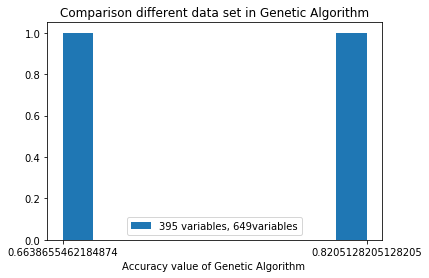

In [23]:
import matplotlib.pyplot as plt
plt.hist([A , B])
legend=['395 variables, 649variables']
plt.title("Comparison different data set in Genetic Algorithm")
plt.xlabel("Accuracy value of Genetic Algorithm ")

plt.legend(legend)
plt.show()

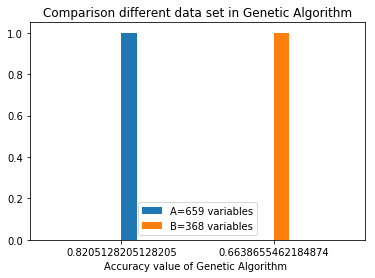

In [24]:
plt.hist(A)
plt.hist(B)
legend=['A=659 variables', 'B=368 variables']
plt.title("Comparison different data set in Genetic Algorithm")
plt.xlabel("Accuracy value of Genetic Algorithm ")
plt.legend(legend)
plt.show()